In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import math
import warnings 
warnings.filterwarnings("ignore")

# Exploration

In [77]:
df  = pd.read_csv("E://Churn_modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [79]:
df.shape

(10000, 14)

In [80]:
df  = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [81]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [82]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [83]:
left  = df[df["Exited"] == 1].Tenure
not_left  = df[df["Exited"] == 0].Tenure

# Visualization

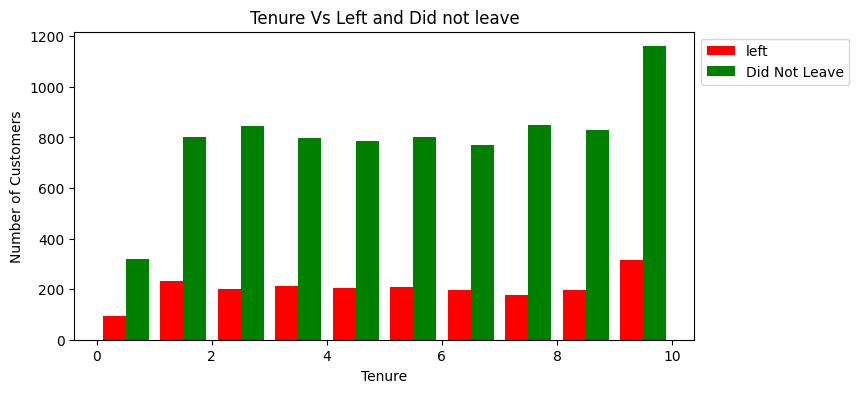

In [84]:
plt.figure(figsize = (8,4))
plt.hist([left,not_left], color = ["red", "green"], label = ["left", "Did Not Leave"])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("Tenure Vs Left and Did not leave");

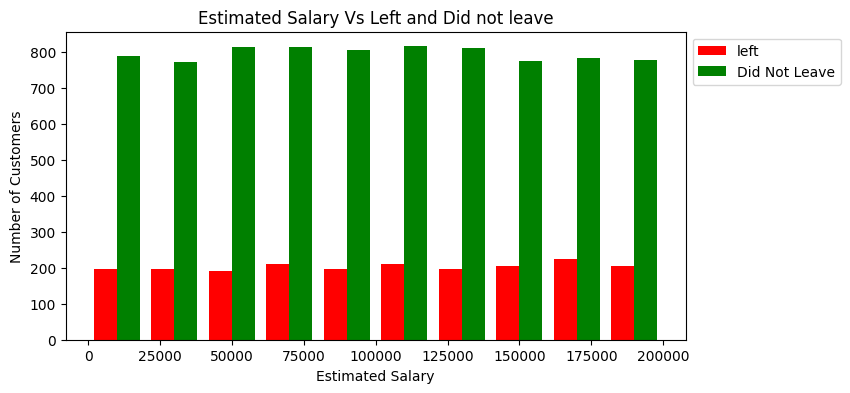

In [85]:
left  = df[df["Exited"] == 1].EstimatedSalary
not_left  = df[df["Exited"] == 0].EstimatedSalary
plt.figure(figsize = (8,4))
plt.hist([left,not_left], color = ["red", "green"], label = ["left", "Did Not Leave"])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Estimated Salary")
plt.ylabel("Number of Customers")
plt.title("Estimated Salary Vs Left and Did not leave");

In [86]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


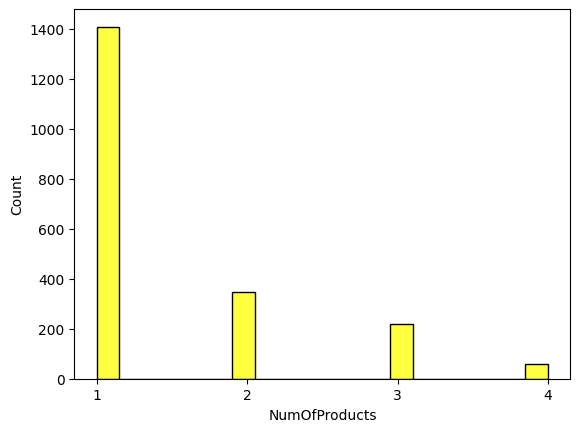

In [87]:
left  = df[df["Exited"] == 1]
sns.histplot(data = left, x = "NumOfProducts", color = "Yellow")
plt.xticks(np.arange(1,5,1));

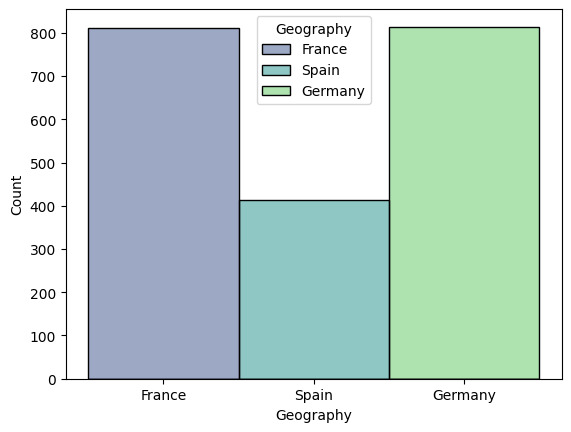

In [88]:
left  = df[df["Exited"] == 1]
sns.histplot(data = left, x= "Geography", palette = "viridis", hue ="Geography" );

In [89]:
df.NumOfProducts.unique()

array([1, 3, 2, 4], dtype=int64)

# Data Preparation

In [90]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [91]:
def categories(data):
    for column in data.columns:
        if data[column].dtypes == "object":
            print(f"{column}: {data[column].unique()}")
            
categories(df)        

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [92]:
def non_categories(data):
    for column in data.columns:
        if data[column].dtypes != "object":
            if not np.all(np.isin(data[column].values, [0,1])): 
               print(f"{column}")
non_categories(df)              

CreditScore
Age
Tenure
Balance
NumOfProducts
EstimatedSalary


In [93]:
df["Gender"] = df["Gender"].replace({"Male":0, "Female":1})

In [94]:
modified_df = pd.get_dummies(data =df, columns =["Geography"]).astype("int")

In [95]:
modified_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0,1,1,1,101348,1,1,0,0
1,608,1,41,1,83807,1,0,1,112542,0,0,0,1
2,502,1,42,8,159660,3,1,0,113931,1,1,0,0
3,699,1,39,1,0,2,0,0,93826,0,1,0,0
4,850,1,43,2,125510,1,1,1,79084,0,0,0,1


In [96]:
scaling_cols = ["CreditScore","Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = MinMaxScaler()
modified_df[scaling_cols] = scaler.fit_transform(modified_df[scaling_cols])

In [97]:
modified_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,1,0,0
1,0.516,1,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,0,1
2,0.304,1,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,0,1


In [98]:
x = modified_df.drop("Exited", axis = 1)
y = modified_df["Exited"]

In [99]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 5)

In [100]:
model  = keras.Sequential([
    keras.Input(shape = (12,)),
    keras.layers.Dense(9, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(3, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")
])

In [101]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x_train,y_train, epochs =100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8037 - loss: 0.5863
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7967 - loss: 0.4824
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7927 - loss: 0.4755
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7911 - loss: 0.4680
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8110 - loss: 0.4424
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8099 - loss: 0.4447
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8073 - loss: 0.4462
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8190 - loss: 0.4295
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8139 - loss: 0.4266
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8233 - loss: 0.4180
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8286 - loss: 0.4042
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━

In [102]:
y_predicted = model.predict(x_test)
y_predicted
predictions= []

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [103]:
for prediction in y_predicted:
    if prediction > 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
        

In [104]:
predictions[:5]

[0, 0, 0, 0, 0]

In [105]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int32

In [106]:
model.evaluate(x_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8434 - loss: 0.3605


[0.357290655374527, 0.8475000262260437]

In [107]:
print(classification_report( y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1595
           1       0.66      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.77      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [108]:
cm  = tf.math.confusion_matrix(predictions,y_test)

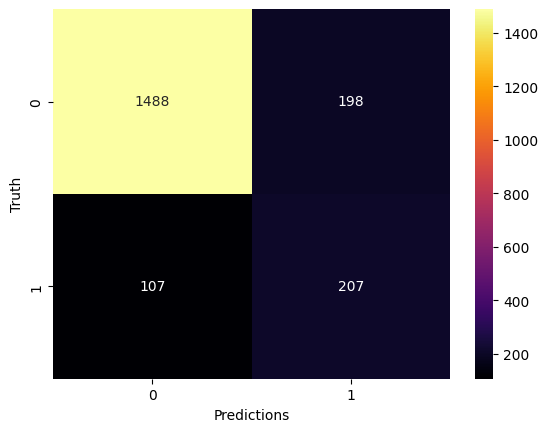

In [109]:
sns.heatmap(cm, annot = True, cmap = "inferno", fmt =  'd')
plt.xlabel("Predictions")
plt.ylabel("Truth");

# Under Sampling

In [110]:
x_train.shape, y_train.shape

((8000, 12), (8000,))

In [111]:
x_test.shape

(2000, 12)

In [112]:
merged_train = pd.concat([x_train, y_train], axis = 1)
merged_train.Exited.value_counts()

Exited
0    6368
1    1632
Name: count, dtype: int64

In [113]:
train_0s = merged_train[merged_train["Exited"] == 0]
train_1s = merged_train[merged_train["Exited"] == 1]
train_0s.shape, train_1s.shape

((6368, 13), (1632, 13))

In [114]:
train_us_0s = train_0s.sample(train_1s.shape[0])
train_us_0s.shape

(1632, 13)

In [115]:
final_train  = pd.concat([train_us_0s, train_1s], axis = 0)
final_train.shape, final_train["Exited"].value_counts()

((3264, 13),
 Exited
 0    1632
 1    1632
 Name: count, dtype: int64)

In [159]:
def classification_r(x_train_us,y_train_us, x_test, y_test):
    model  = keras.Sequential([
    keras.Input(shape = (12,)),
    keras.layers.Dense(9, activation = "relu"),
    keras.layers.Dense(6, activation = "relu"),
    keras.layers.Dense(3, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid")])
    model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    model.fit(x_train_us,y_train_us, epochs =100)
    y_pred = model.predict(x_test)
    predictions_new= []
    for prediction in y_pred:
       if prediction > 0.5:
           predictions_new.append(1)
       else:
           predictions_new.append(0)
    print("Classification Report: \n",classification_report( y_test, predictions_new))
    return predictions_new
    

In [117]:
x_train_us = final_train.drop("Exited", axis=1)
y_train_us = final_train["Exited"]
classification_r(x_train_us,y_train_us, x_test, y_test)

Epoch 1/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5246 - loss: 0.6874
Epoch 2/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5794 - loss: 0.6741
Epoch 3/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6191 - loss: 0.6662
Epoch 4/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6343 - loss: 0.6586
Epoch 5/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6482 - loss: 0.6488
Epoch 6/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6702 - loss: 0.6406
Epoch 7/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6529 - loss: 0.6399
Epoch 8/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6484 - loss: 0.6394
Epoch 9/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6606 - loss: 0.6297
Epoch 10/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6588 - loss: 0.6259
Epoch 11/100
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6837 - loss: 0.6143
Epoch 12/100
102/102 ━━━━━━━━━━━━━━━━━━━

# Over Sampling

In [118]:
x_train_us.shape,y_train_us.shape

((3264, 12), (3264,))

In [119]:
train_0s.shape, train_1s.shape

((6368, 13), (1632, 13))

In [120]:
train_os_1s = train_1s.sample(6368,replace =True)
train_os_1s.shape

(6368, 13)

In [121]:
final_os = pd.concat([train_0s,train_os_1s], axis = 0)
final_os.shape, final_os["Exited"].value_counts()

((12736, 13),
 Exited
 0    6368
 1    6368
 Name: count, dtype: int64)

In [122]:
x_train_os = final_os.drop("Exited", axis =1)
y_train_os = final_os["Exited"]

In [123]:
x_train_os.shape, y_train_os.value_counts()

((12736, 12),
 Exited
 0    6368
 1    6368
 Name: count, dtype: int64)

In [124]:
classification_r(x_train_os,y_train_os, x_test, y_test)

Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5014 - loss: 0.7118
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6426 - loss: 0.6569
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6828 - loss: 0.6288
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6823 - loss: 0.6101
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7175 - loss: 0.5777
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7321 - loss: 0.5556
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7516 - loss: 0.5352
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7498 - loss: 0.5267
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7579 - loss: 0.5151
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7617 - loss: 0.5086
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7673 - loss: 0.4998
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━

# SMOTE

In [125]:
from imblearn.over_sampling import SMOTE

In [126]:
smote = SMOTE(sampling_strategy="minority")

In [127]:
x_sm, y_sm = smote.fit_resample(x_train, y_train)

In [128]:
x_sm.shape

(12736, 12)

In [129]:
y_sm.value_counts()

Exited
0    6368
1    6368
Name: count, dtype: int64

In [130]:
classification_r(x_sm,y_sm, x_test, y_test)

Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5487 - loss: 0.6868
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6681 - loss: 0.6365
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7023 - loss: 0.5962
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7214 - loss: 0.5765
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7197 - loss: 0.5674
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7205 - loss: 0.5665
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7180 - loss: 0.5594
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7280 - loss: 0.5490
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7235 - loss: 0.5466
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7374 - loss: 0.5327
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7493 - loss: 0.5154
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━

 # Ensemble

In [187]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 15)
y_train.value_counts()

Exited
0    6370
1    1630
Name: count, dtype: int64

In [188]:
6370/1630

3.9079754601226995

In [189]:
merged_train = pd.concat([x_train, y_train], axis  = 1)
train_0s = merged_train[merged_train["Exited"] == 0]
train_1s = merged_train[merged_train["Exited"] == 1]
train_0s.shape, train_1s.shape 

((6370, 13), (1630, 13))

In [190]:
def ensemble(df_majority, df_minority, start , end):
    final_df  = pd.concat([df_majority[start:end], df_minority], axis = 0)
    x_train = final_df.drop("Exited", axis =1)
    y_train = final_df.Exited
    return x_train, y_train
    

In [191]:
x_train_1, y_train_1  = ensemble(train_0s, train_1s, 0 , 2666)

In [192]:
x_train.shape, y_test.shape

((8000, 12), (2000,))

In [193]:
pred_1 = classification_r(x_train_1,y_train_1, x_test, y_test)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4220 - loss: 0.8000
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6436 - loss: 0.6480
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6552 - loss: 0.6321
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6703 - loss: 0.6119
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6727 - loss: 0.6104
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6808 - loss: 0.5932
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6846 - loss: 0.5878
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6950 - loss: 0.5834
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6975 - loss: 0.5786
Epoch 10/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7123 - loss: 0.5660
Epoch 11/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7214 - loss: 0.5502
Epoch 12/100
135/135 ━━━━━━━━━━━━━━━━━━━━

In [194]:
x_train_2, y_train_2  = ensemble(train_0s, train_1s, 2666 , 2666*2)
x_train_3, y_trian_3  =ensemble(train_0s, train_1s, 2666*2 , 8001)

In [195]:
pred_2 = classification_r(x_train_2, y_train_2, x_test, y_test)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6268 - loss: 0.6759
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6197 - loss: 0.6489
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6242 - loss: 0.6284
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6290 - loss: 0.6068
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6932 - loss: 0.5960
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6853 - loss: 0.6011
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6980 - loss: 0.5863
Epoch 8/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7108 - loss: 0.5806
Epoch 9/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7152 - loss: 0.5801
Epoch 10/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7254 - loss: 0.5662
Epoch 11/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7237 - loss: 0.5564
Epoch 12/100
135/135 ━━━━━━━━━━━━━━━━━━━━

In [196]:
pred_3 = classification_r(x_train_3, y_trian_3, x_test, y_test)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5997 - loss: 0.6719
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6351 - loss: 0.6421
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6592 - loss: 0.6298
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6685 - loss: 0.6116
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6888 - loss: 0.5970
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6993 - loss: 0.5837
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6751 - loss: 0.5977
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6861 - loss: 0.5889
Epoch 9/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7027 - loss: 0.5728
Epoch 10/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7076 - loss: 0.5689
Epoch 11/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6968 - loss: 0.5825
Epoch 12/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy

In [206]:
final_pred= pred_1.copy()
def ones():
    for i in range(len(pred_1)):
        ones  = pred_1[i] + pred_2[i] + pred_3[i] 
        if ones > 1:
            final_pred[i] = 1
        else:
            final_pred[i] = 0
    return final_pred
final_pred = ones()

In [207]:
print(classification_report(y_test, final_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1593
           1       0.55      0.70      0.62       407

    accuracy                           0.82      2000
   macro avg       0.73      0.78      0.75      2000
weighted avg       0.84      0.82      0.83      2000

